In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test.shape

(10000, 1)

In [12]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


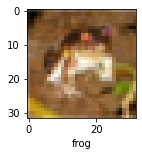

In [15]:
plot_sample(X_train, y_train, 0)


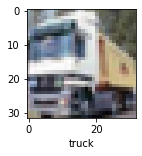

In [16]:
plot_sample(X_train,y_train,1)

In [17]:
X_train=X_train/255.0
X_test=X_test/255.0


In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8102 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6220 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5409 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4807 - accuracy: 0.4807
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4301 - accuracy: 0.4961


In [26]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4597 - accuracy: 0.4859


[1.4596896171569824, 0.48590001463890076]

In [27]:
from sklearn.metrics import confusion_matrix , classification_report


In [28]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.46      0.53      1000
           1       0.48      0.73      0.58      1000
           2       0.43      0.28      0.34      1000
           3       0.34      0.36      0.35      1000
           4       0.52      0.33      0.41      1000
           5       0.47      0.27      0.34      1000
           6       0.48      0.62      0.54      1000
           7       0.54      0.54      0.54      1000
           8       0.57      0.65      0.61      1000
           9       0.43      0.62      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [29]:
# CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 7ms/step - loss: 1.4764 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1378 - accuracy: 0.5981
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0021 - accuracy: 0.6516
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9169 - accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8470 - accuracy: 0.7054
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7951 - accuracy: 0.7239
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7410 - accuracy: 0.7404
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6982 - accuracy: 0.7564
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6586 - accuracy: 0.7697
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [31]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9246 - accuracy: 0.6960


[0.9246149659156799, 0.6959999799728394]

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.0021808e-04, 3.1787204e-04, 7.8501221e-04, 7.5551158e-01,
        3.3911088e-04, 7.1438394e-02, 1.6448607e-01, 1.1407050e-05,
        5.7692737e-03, 6.4108305e-04],
       [2.4580448e-03, 1.6143959e-02, 7.3746077e-07, 3.3537542e-06,
        3.0036322e-08, 8.2733870e-08, 4.2619600e-08, 5.8362798e-10,
        9.8079991e-01, 5.9379009e-04],
       [4.1566350e-02, 4.8451570e-01, 3.6714796e-04, 7.4530728e-03,
        9.2537208e-03, 3.9459256e-04, 1.6439943e-04, 2.6608910e-03,
        4.0584284e-01, 4.7781389e-02],
       [9.5270646e-01, 7.4259741e-03, 3.6279066e-03, 2.0124286e-03,
        1.2194135e-04, 1.7021492e-06, 3.1798277e-03, 5.6747916e-07,
        3.0898983e-02, 2.4217270e-05],
       [7.8639669e-06, 7.5246890e-06, 1.6057869e-02, 5.5852793e-02,
        2.4625190e-01, 2.0797586e-03, 6.7939115e-01, 1.8343084e-06,
        3.3124757e-04, 1.8150342e-05]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [34]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

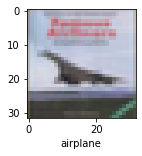

In [35]:
plot_sample(X_test, y_test,3)

In [36]:
classes[y_classes[3]]

'airplane'

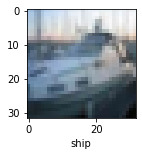

In [37]:
plot_sample(X_test, y_test,2)

In [38]:
classes[y_classes[2]]

'automobile'